<a href="https://colab.research.google.com/github/danielfrgs/2023_1-Datos_Masivos_II/blob/main/Unidad3/Hits_FragosoAlvaradoDaniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importación de librerías necesarias 
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def hits(G, k):
  # Hacer k iteraciones:
  for l in range(k):
    # En la primera iteración:
    if l == 0:
      # Inicia los hubs y auths con 1
      auth_p = [1]*len(G)
      hub_p = [1]*len(G)

      # Listas de apoyo para calcular el siguiente paso
      auth_f = [0]*len(G)
      hub_f = [0]*len(G)

    # Para cada arista:
    for a, b in G.in_edges():
      # Aumenta el valor de la autoridad 
      auth_f[b-1] += hub_p[a-1]
      # Aumenta el valor del hub
      hub_f[a-1] += auth_p[b-1]

    # Las autoridades y hubs nuevos, se convierten en pasados
    auth_p = auth_f.copy()
    hub_p = hub_f.copy()

  # Normalizar la salida
  auth_p = np.array(auth_p)/sum(auth_p)
  hub_p = np.array(hub_p)/sum(hub_p)

  # Retorna los resultados
  return hub_p, auth_p

In [3]:
# Carga de datos
data = pd.read_csv('data_hist.txt', sep = ' ', header=None).values

In [4]:
# Creación del grafo
G = nx.DiGraph()
G.add_edges_from(data)

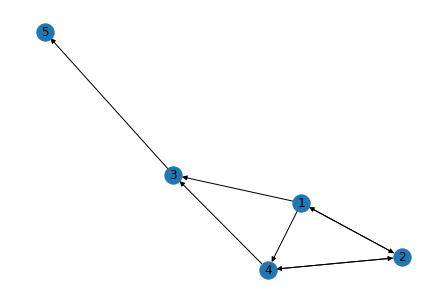

In [5]:
# Gráfica del grafo
nx.draw(G, with_labels=True)

In [6]:
# Prueba de nuesta función
%%time
h, a = hits(G,100)

CPU times: user 2.39 ms, sys: 0 ns, total: 2.39 ms
Wall time: 7.39 ms


In [7]:
# Impresión de resultados
print("Hub scores: ", h) 
print("Authority scores: ", a) 

Hub scores:  [0.48198050606193665 0.1726731646461217 1.4272539278449434e-21
 0.3453463292919417 0.0]
Authority scores:  [0.06957071750743002 0.33333333333327064 0.33333333333327064
 0.2637626158260287 1.2587196502725964e-21]


In [8]:
# Comparación con función de Networkx
%%time
h, a = nx.hits(G, tol=0)

CPU times: user 71.1 ms, sys: 12.6 ms, total: 83.7 ms
Wall time: 143 ms


In [9]:
# Impresión de resultados de Networkx
print("Hub scores: ", h) 
print("Authority scores: ", a) 

Hub scores:  {1: 0.48198050606196574, 2: 0.17267316464601148, 3: 1.4310010472015295e-17, 4: 0.34534632929202286, 5: 0.0}
Authority scores:  {1: 0.06957071750736005, 2: 0.3333333333333333, 3: 0.3333333333333333, 4: 0.2637626158259734, 5: 2.7624463247954646e-17}


## Ejercicio

### Construcción de la red

In [61]:
# Número de nodos
nodes = list(range(1, 10001))

In [62]:
# Impoertamos y definimos una semilla
from random import seed
from random import randint

seed(1989)

In [63]:
# Definimos los nodos a los que irán cada nodo de forma aleatoria
relations = []

for i in range(len(nodes)):
  relations.append(randint(1, 10000))

In [64]:
# Creamos relaciones extra 
for i in range(100000):
  nodes.append(randint(1, 10000))

In [65]:
for i in range(100000):
  relations.append(randint(1, 10000))

In [66]:
# Lo agregamos todo a un dataframe
data_2 = pd.DataFrame(list(zip(nodes, relations)))

In [67]:
# Creación del grafo
G = nx.DiGraph()
G.add_edges_from(data_2.values)

### Comparación

In [68]:
%%time
h, a = hits(G,100)

CPU times: user 20.3 s, sys: 82.2 ms, total: 20.4 s
Wall time: 20.5 s


In [69]:
# Impresión de resultados
print("Hub scores: ", h) 
print("Authority scores: ", a) 

Hub scores:  [6.33849598711271e-05 4.421024165374585e-05 6.632426136194097e-05 ...
 7.848195336025894e-05 9.644520225664434e-05 8.273718043538043e-05]
Authority scores:  [5.7431632875501726e-05 0.00013213099617953816 7.003583733721355e-05 ...
 0.00010144629182167996 7.72612360330915e-05 3.3432839808166735e-05]


In [70]:
# Comparación con función de Networkx
%%time
h, a = nx.hits(G, tol=0)

CPU times: user 594 ms, sys: 43.1 ms, total: 637 ms
Wall time: 608 ms


In [71]:
# Impresión de resultados de Networkx
print("Hub scores: ", h) 
print("Authority scores: ", a) 

Hub scores:  {1: 6.33849598711271e-05, 9303: 6.377681576390684e-05, 2: 4.4210241653745834e-05, 2718: 7.5487255459462e-05, 3: 6.632426136194096e-05, 4121: 6.416503246229175e-05, 4: 0.00010287409397841608, 1801: 9.577783531177693e-05, 5: 7.56521905844181e-05, 7119: 0.0001030926164949778, 6: 7.817892489708144e-05, 9006: 0.0001312036520232653, 7: 4.9106016442634615e-05, 4719: 5.1476565564169546e-05, 8: 8.103313131064651e-05, 8452: 0.00010259275878405403, 9: 0.00012904133066022564, 4259: 0.00010953690313035439, 10: 5.680939020748857e-05, 1291: 6.499427319185608e-05, 11: 8.171965931677152e-05, 5019: 0.00016540534825128757, 12: 0.0001088435731651756, 1988: 0.0001234425565197071, 13: 0.00010842823276220529, 4718: 0.00010680681599071328, 14: 0.00010530747181497319, 4722: 0.0001568409175370831, 15: 7.410735575261035e-05, 2125: 0.0001307145714121006, 16: 6.964784378332242e-05, 8865: 9.689159732765311e-05, 17: 9.466349063725535e-05, 4626: 6.77117989921794e-05, 18: 9.799726473528112e-05, 7710: 8.08